# Now let's look at Finishing Maps by adding Legends, Titles, Axes, Labels, and Scalebars, and a some extra Basemap Formatting
### --------------------------------------------------------------------------------------
    # We will walkthrough Legend parameters
    # and Label parameters
    # and attempt to add a scale bar

##### https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html

### Think of Python as a tool to produce the graphic image, but not the best for finalizing the official product.  In the same way you can use ArcGIS to get the map corretcly finished, then export an image to put in a powerpoint, then add the seals, etc. Python can get that point excellently.  But Python is limited in adding image insets and the scale bar cna be very tricky to get perfectly.

### ------------------

In [1]:
#!/usr/bin/python
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import IMPERIAL_LENGTH
from mpl_toolkits.basemap import Basemap
import matplotlib.transforms
import pyproj
import io
%matplotlib inline

In [2]:
bestPizza = pd.read_csv("../data/PizzaEssentials.csv",index_col=False)
restPandI = pd.read_csv("../data/restPandI.csv")
print(restPandI.shape)
allPizza = pd.read_csv("../data/restPizza.csv")
print(allPizza.shape)
subway = pd.read_csv("../data/subwayStations.csv", index_col=0)
print(subway.shape)


(31171, 12)
(31171, 12)
(473, 8)


## Matplotlib:    Legends and Scalebars


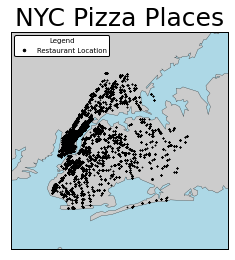

<Figure size 2100x1400 with 0 Axes>

In [3]:

# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
bmap = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
bmap.drawcoastlines(linewidth=0.25)
bmap.drawcountries(linewidth=0.25)
bmap.fillcontinents(lake_color='aqua')
bmap.drawmapboundary(fill_color='lightblue')
x,y = bmap(lon, lat)


# ADDING THE "LABEL=" PARAETER WILL ADD THIS DATA TO THE MAP
bmap.plot(x, y, ".",color='k', markersize=1, label="Restaurant Location")
### ADD TITLE
plt.title('NYC Pizza Places', fontsize=25)
# SETTING THE LEGEND
plt.legend(loc="upper left",title='Legend', markerscale=5,
           frameon=True,facecolor='white', edgecolor='k',fancybox=True,framealpha=1,fontsize=7,title_fontsize=7)
plt.rcParams['figure.dpi'] = 350
plt.show()
#### SAVE TO FILE
plt.savefig('../data/Legend1.png')

### You can change the position of the legend with the "loc= " parameter
        'upper right'  : 1,
        'upper left'   : 2,
        'lower left'   : 3,
        'lower right'  : 4,
        'right'        : 5,
        'center left'  : 6,
        'center right' : 7,
        'lower center' : 8,
        'upper center' : 9,
        'center'       : 10

### And you can also place the legend outside of the bounding box for mapping graphics with a lot to show  with "bbox_to_anchor=   "

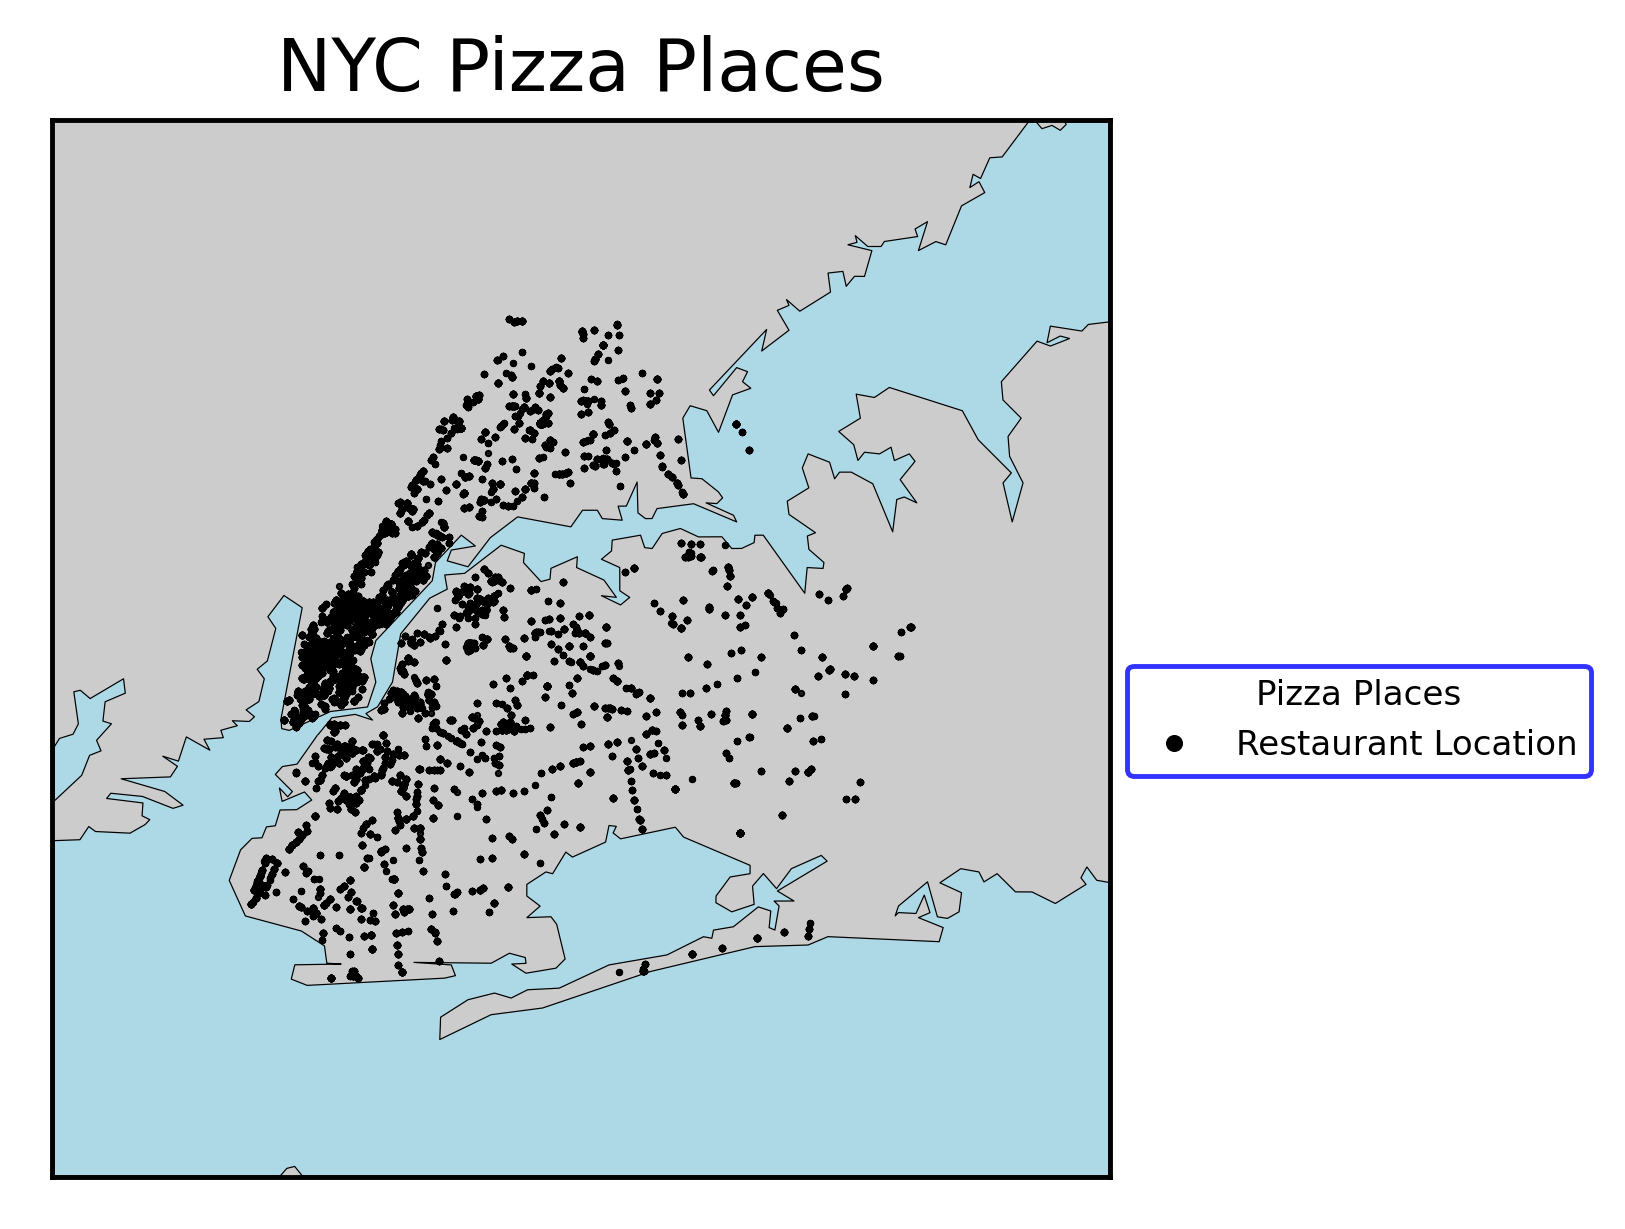

<Figure size 2100x1400 with 0 Axes>

In [4]:
# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
bmap = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
bmap.drawcoastlines(linewidth=0.25)
bmap.drawcountries(linewidth=0.25)
bmap.fillcontinents(lake_color='aqua')
bmap.drawmapboundary(fill_color='lightblue')
x,y = bmap(lon, lat)


# ADDING THE "LABEL=" PARAETER WILL ADD THIS DATA TO THE MAP
bmap.plot(x, y, ".",color='black', markersize=1, label="Restaurant Location")
### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND OUTSIDE OF BBOX
plt.legend(bbox_to_anchor=(1, 0.5),title="Pizza Places",  markerscale=5,fontsize=7, title_fontsize=7,
          fancybox=True,edgecolor = 'b')
plt.rcParams['figure.dpi'] = 350
plt.show()

#### SAVE TO FILE
plt.savefig('../data/Legend2.png')

### Next we'll plot 2 types of data and display those in the legend

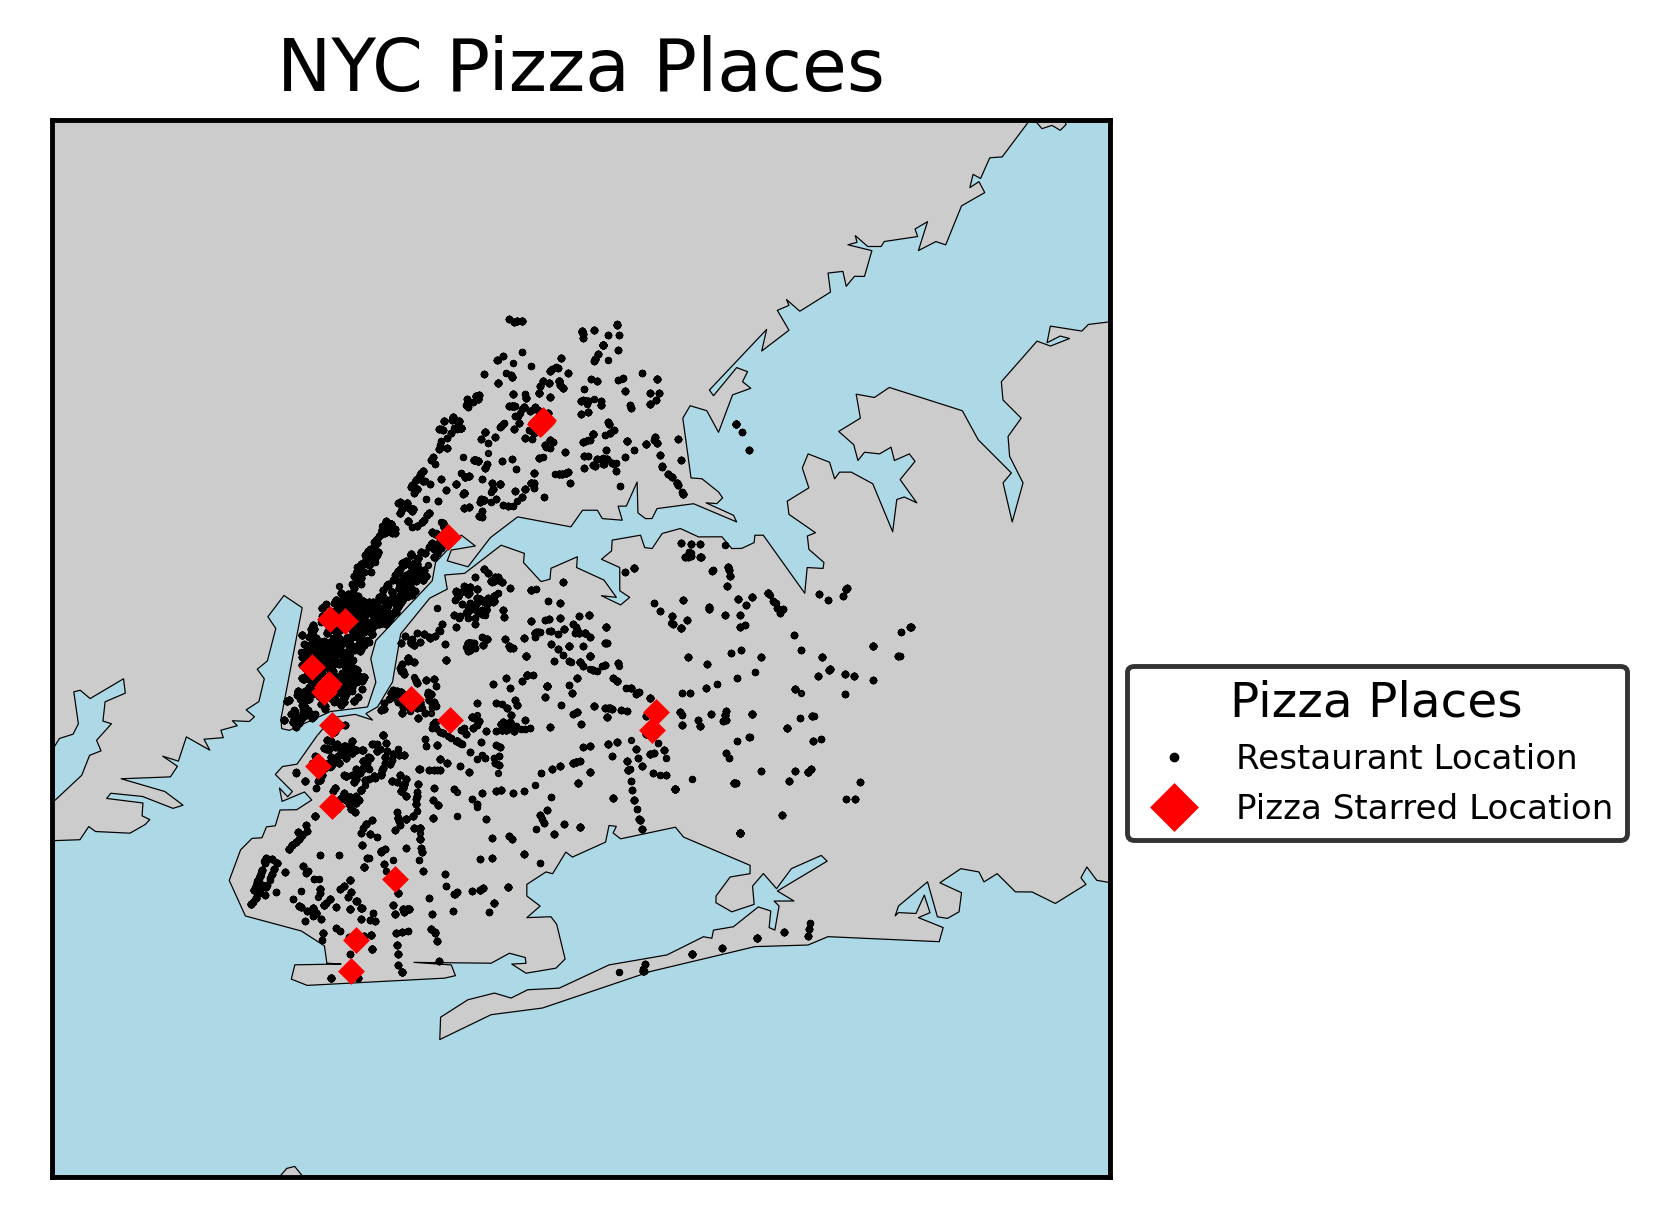

<Figure size 2100x1400 with 0 Axes>

In [6]:
# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
bmap = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
bmap.drawcoastlines(linewidth=0.25)
bmap.drawcountries(linewidth=0.25)
bmap.fillcontinents(lake_color='aqua')
bmap.drawmapboundary(fill_color='lightblue')
x,y = bmap(lon, lat)
x1,y1 = bmap(bestPizza['Longitude'], bestPizza['Latitude'])

# ADDING THE "LABEL=" PARAETER WILL ADD THIS DATA TO THE MAP
bmap.plot(x, y, ".",color='k', markersize=1, label="Restaurant Location")
bmap.plot(bestPizza['Longitude'], bestPizza['Latitude'], "D",color='red', markersize=3, label="Pizza Starred Location")

### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND OUTSIDE OF BBOX
plt.legend(bbox_to_anchor=(1, 0.5),title="Pizza Places",  markerscale=2,fontsize=7, title_fontsize=10,
          fancybox=True,edgecolor = 'k')
plt.rcParams['figure.dpi'] = 350
plt.show()

#### SAVE TO FILE
plt.savefig('../data/Legend3.png')

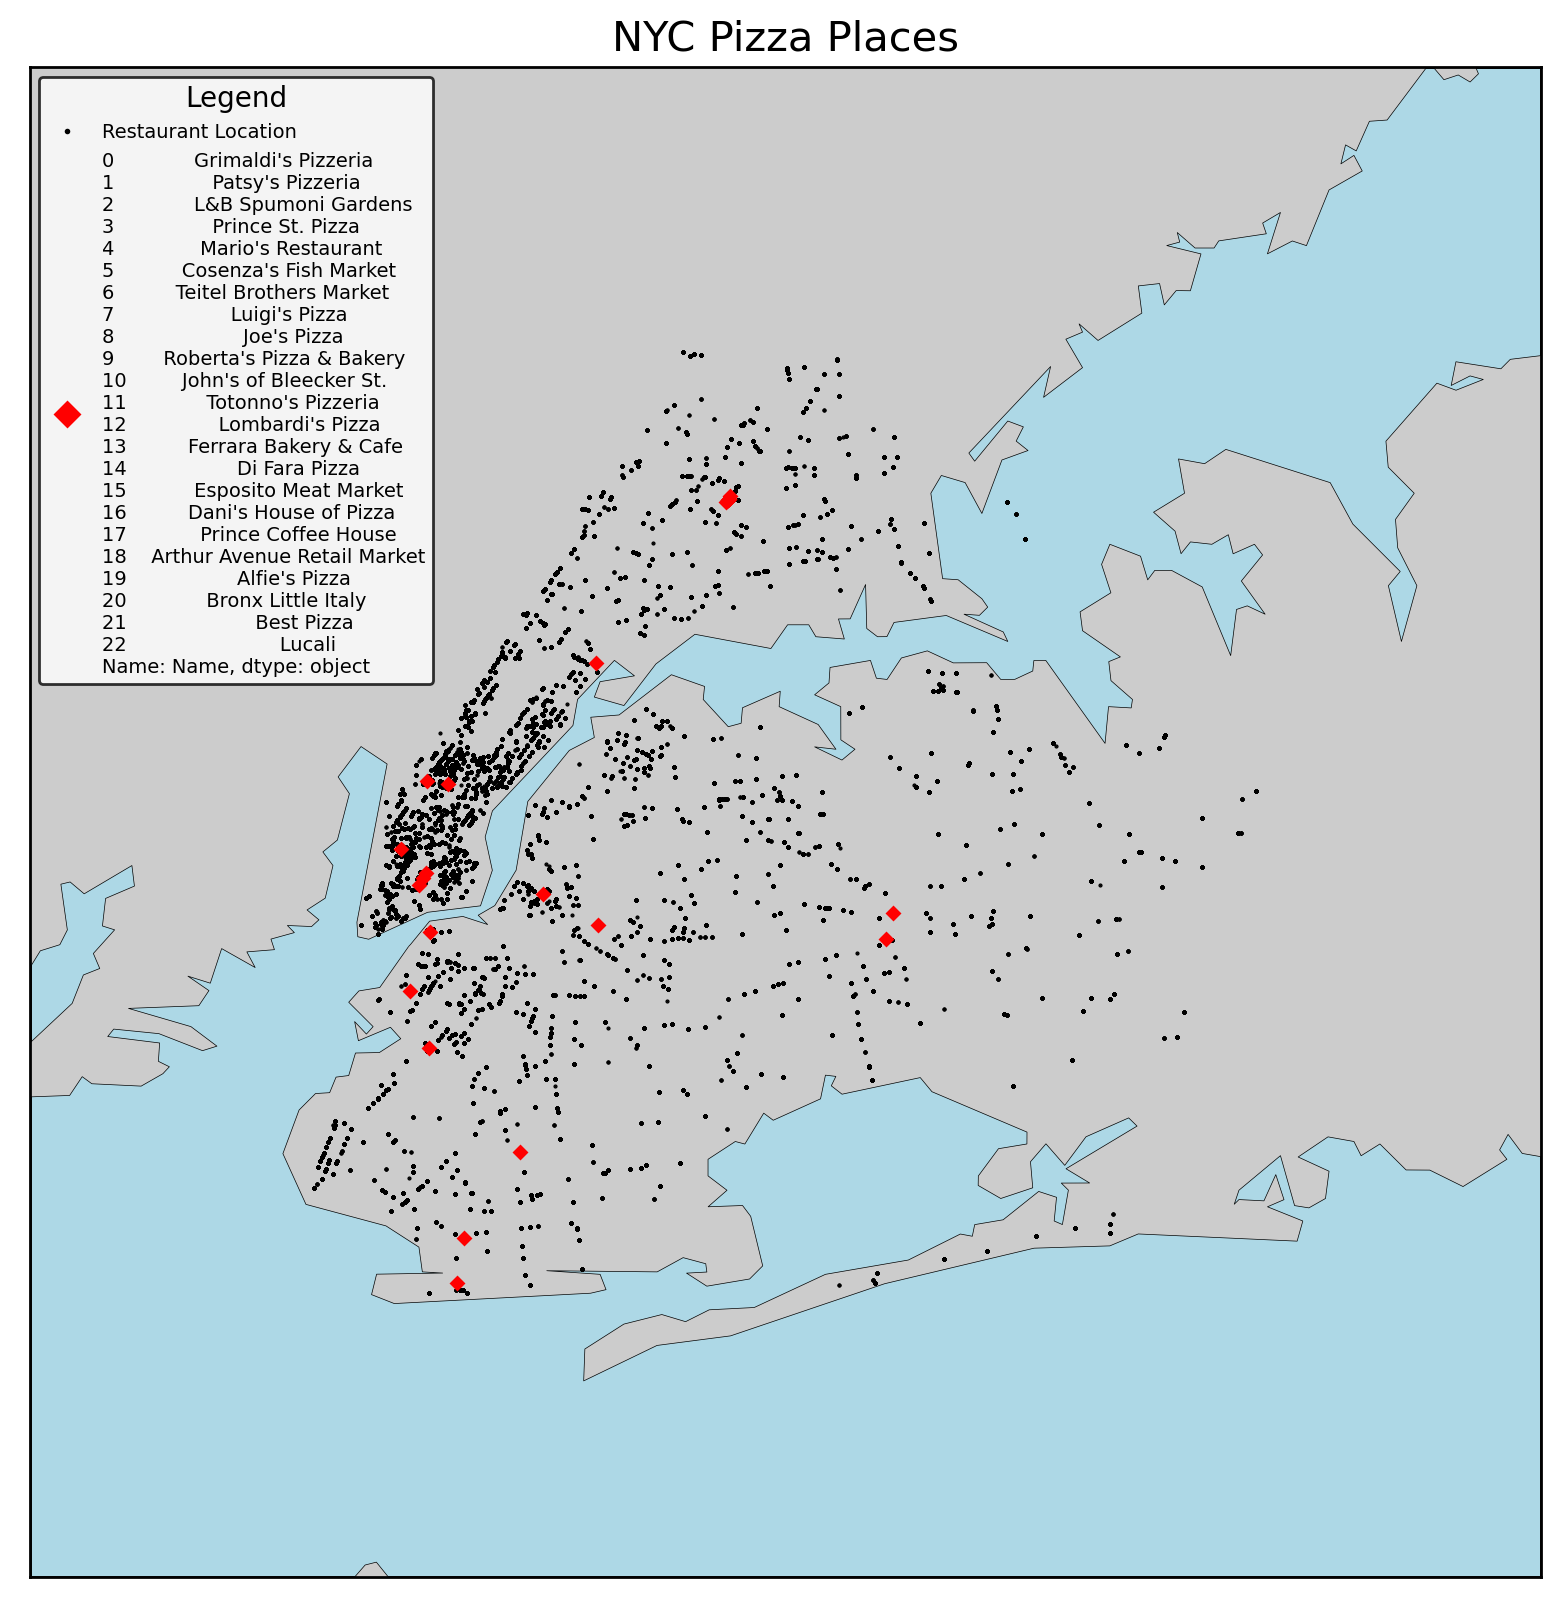

In [27]:
# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.figure(figsize=(10,10))
# create map using BASEMAP
ax = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
ax.drawcoastlines(linewidth=0.25)
ax.drawcountries(linewidth=0.25)
ax.fillcontinents(lake_color='aqua')
ax.drawmapboundary(fill_color='lightblue')
x,y = bmap(lon, lat)
x1,y1 = bmap(bestPizza['Longitude'], bestPizza['Latitude'])

# ADDING THE "LABEL=" PARAMETER WILL ADD THIS DATA TO THE MAP
ax.plot(x, y, ".",color='k', markersize=1, label="Restaurant Location")
ax.plot(bestPizza['Longitude'], bestPizza['Latitude'], "D",color='red', markersize=3, label=bestPizza['Name'])

### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND 
plt.legend(loc="upper left",title='Legend',
           frameon=True,  markerscale=2,fontsize=7, title_fontsize=10,
          fancybox=True,edgecolor = 'k')
plt.show()

#### SAVE TO FILE
plt.savefig('../data/Legend4.png')

## Scalebars
These are not easy to do. I tried 2 different ways: mapscalebar and AnchorScaleBar. I could not get either to work.  Here is the documentation.  Good Luck!

#### https://pypi.org/project/matplotlib-scalebar/
#### https://stackoverflow.com/questions/39786714/how-to-insert-scale-bar-in-a-map-in-matplotlib
#### https://github.com/ppinard/matplotlib-scalebar/issues/20

I will quote the docs here on matplotlib-scalebar

How to use

There are two modes of operation:

    Length, value and units of the scale bar are automatically determined based on the specified pixel size dx and length_fraction. The value will only take the following numbers: 1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 200, 500 or 750.
    The desired value and units are specified by the user (fixed_value and fixed_units) and the length is calculated based on the specified pixel size dx.

The constructor arguments dx and units specify the pixel dimension. For example scalebar = ScaleBar(0.2, 'um') indicates that each pixel is equal to 0.2 micrometer. If the the axes image has already been calibrated by setting its extent, set dx to 1.0.

Special notes for __geospatial plots__: If you are plotting geospatial coordinates (such as scatterplots of the location of structures, geopandas geodataframe plots, etc.), dx needs to be set differently depending on the coordinate system:

    For UTM based coordinate system, where the X and Y are in meters, simply set dx = 1.
    For WGS or NAD based coordinate system, where X and Y are in latitude (Y) and longitude (X), compute the distance between two points at the latitude (Y) you wish to have the scale represented and are also one full degree of longitude (X) apart, in meters. For example dx = great_circle_distance((X, Y), (X + 1, Y))

The system of units (SI, imperial, etc.) is defined by the argument dimension. By default, the scale bar uses SI units of length (e.g. m, cm, um, km, etc.). See examples below for other system of units.


## NOTE
    These scale bar methods only work on geodataframes. And most easily when in WGS Lat/Long coordinates.

### Here's some examples with a GeoDataFrame

In [9]:
points = gpd.read_file("../shapefiles/pizzaTSPgeopandas.shp")
points.crs = {'init': 'epsg:4326'}
print(points.crs)


+init=epsg:4326 +type=crs


/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
points['geometry'].crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Following the documentation, I used a geodataframe in Lat/Long WGS with the ESPG 4326.  This one runs, but I'm not sure the scale size is correct.  

In [11]:
#!pip install great-circle-calculator

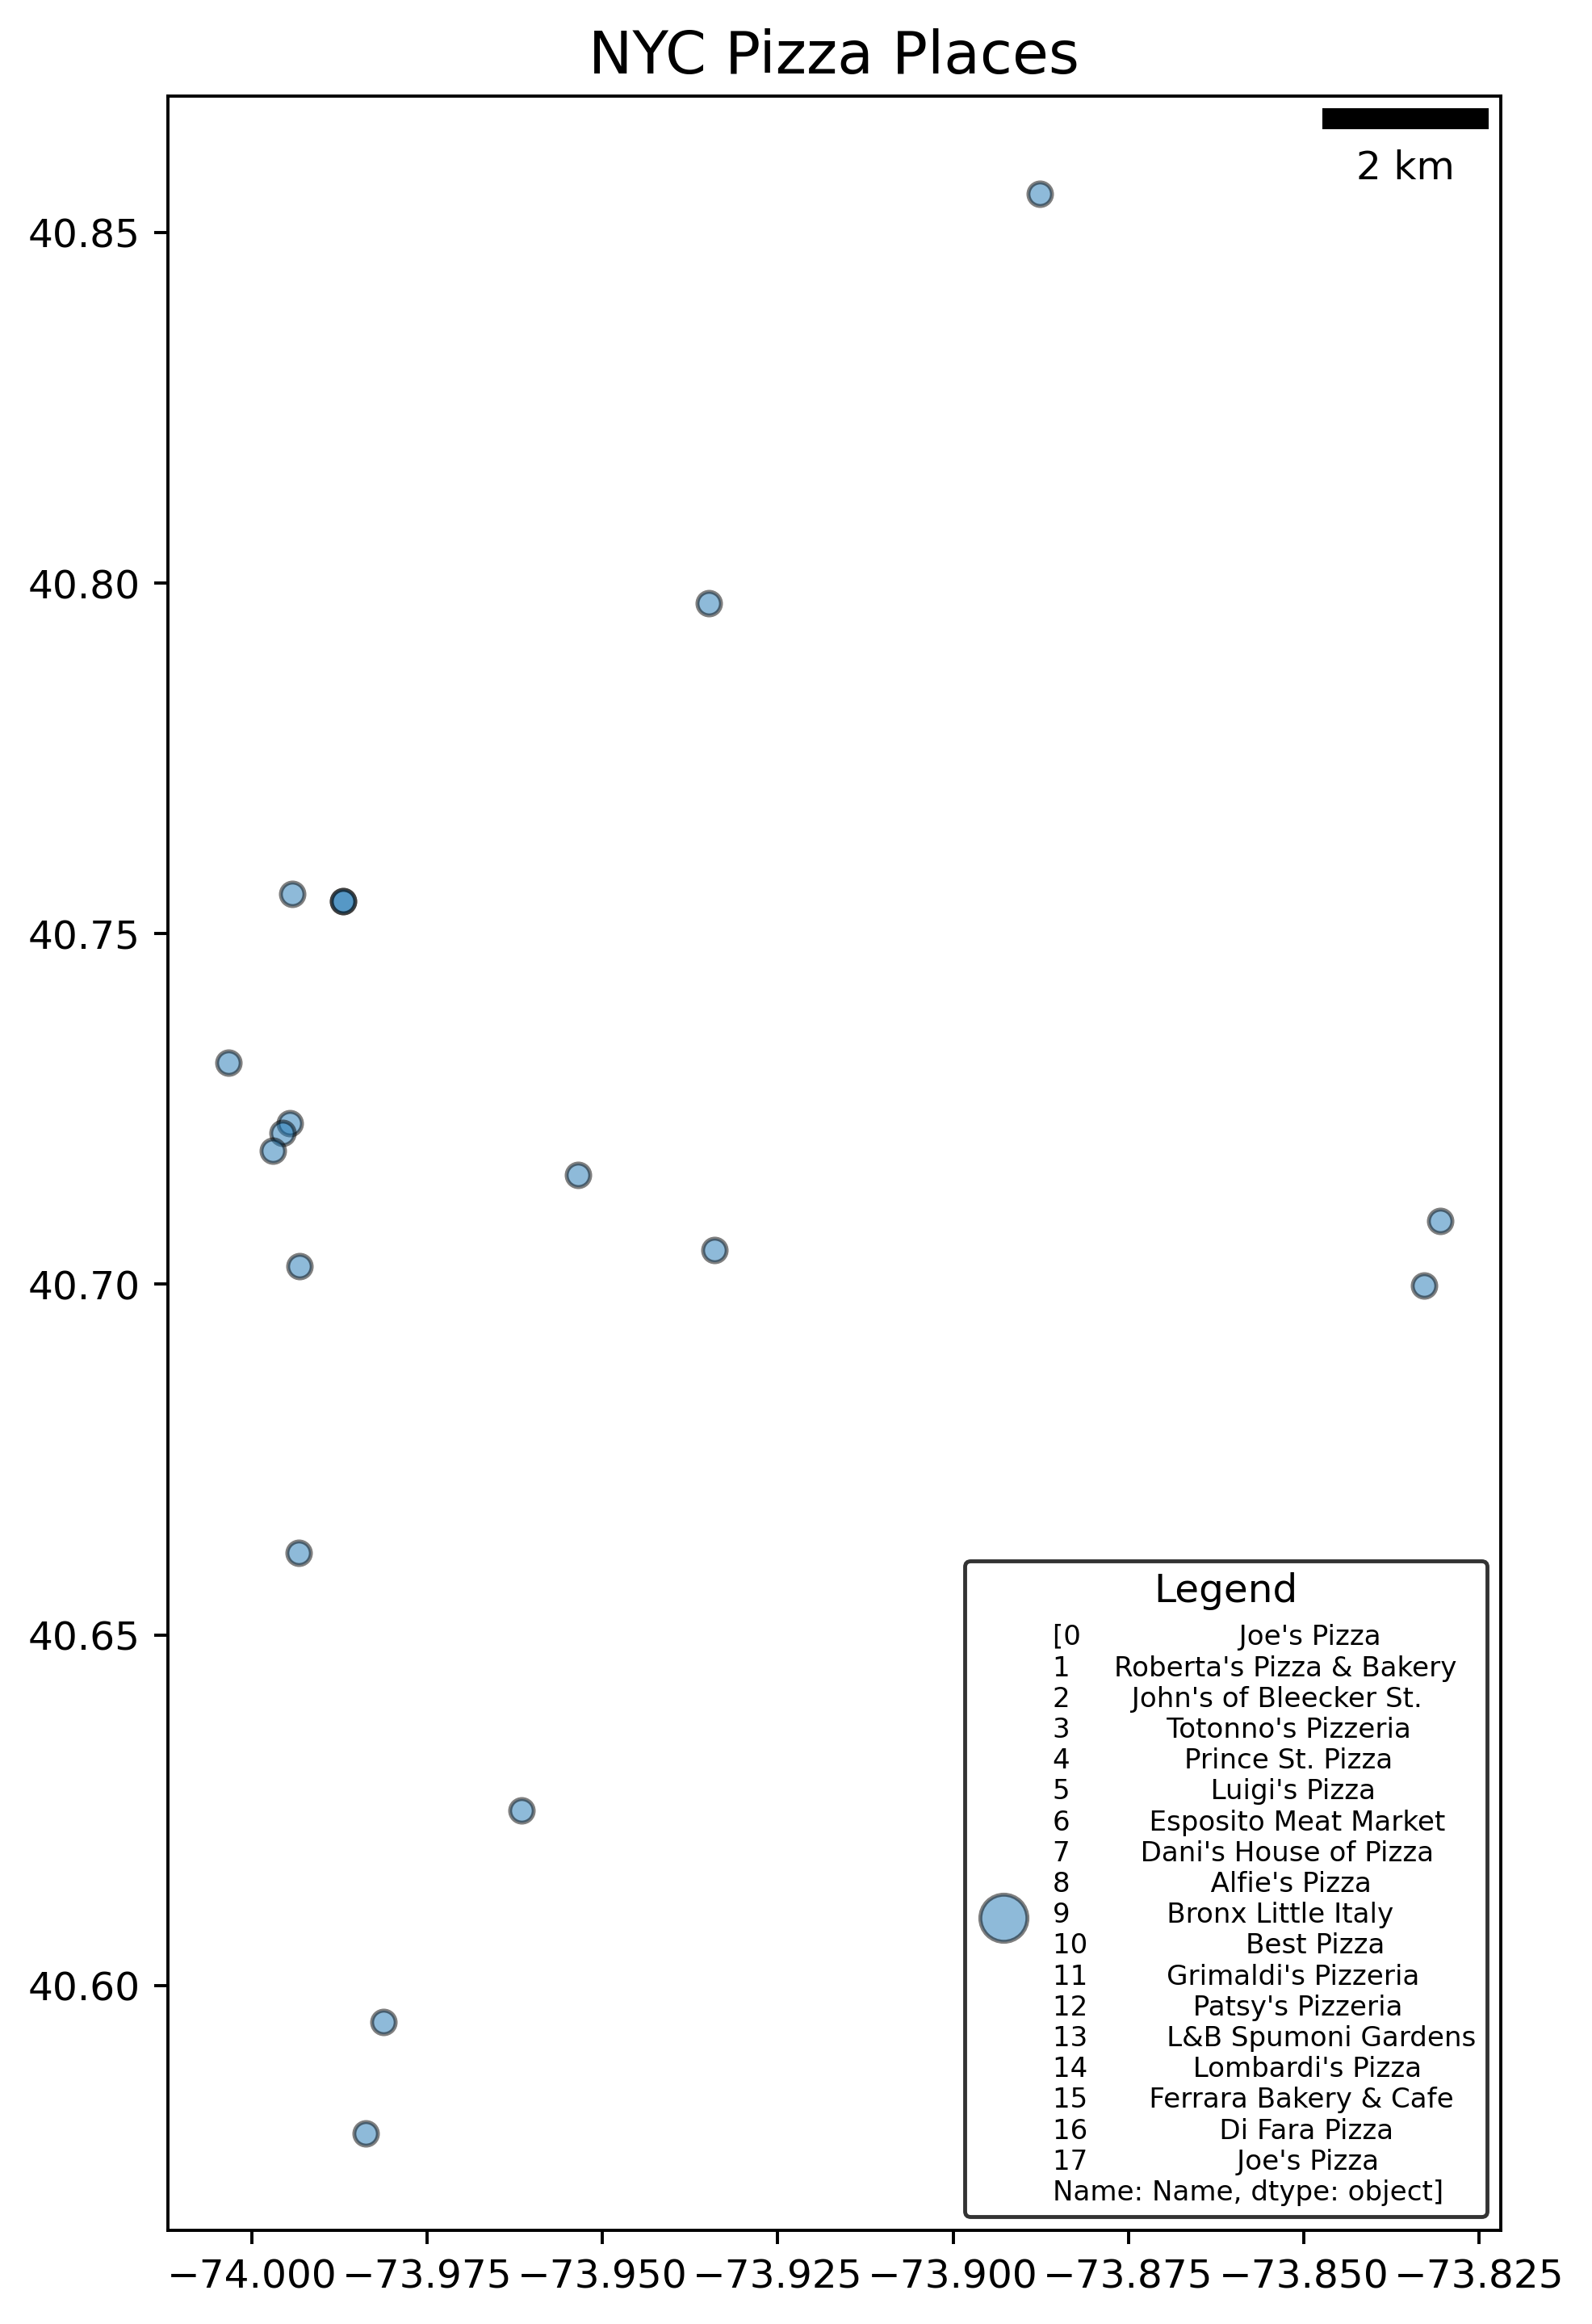

In [13]:
from great_circle_calculator.great_circle_calculator import *

ax = points.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', label=[points['Name']])

x1, x2, y1, y2 = ax.axis()
_y = (y1+y2)/2
p1, p2 = (int(x1), _y), (int(x1)+1, _y)
meter_per_deg = distance_between_points(p1, p2)
scale_bar = ScaleBar(meter_per_deg, units="m")
plt.gca().add_artist(scale_bar)


### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND 
plt.legend(loc="lower right",title='Legend',
           frameon=True,  markerscale=2,fontsize=7, title_fontsize=10,
          fancybox=True,edgecolor = 'k')

#### SAVE TO FILE
plt.savefig('../data/Scalebar1.png')

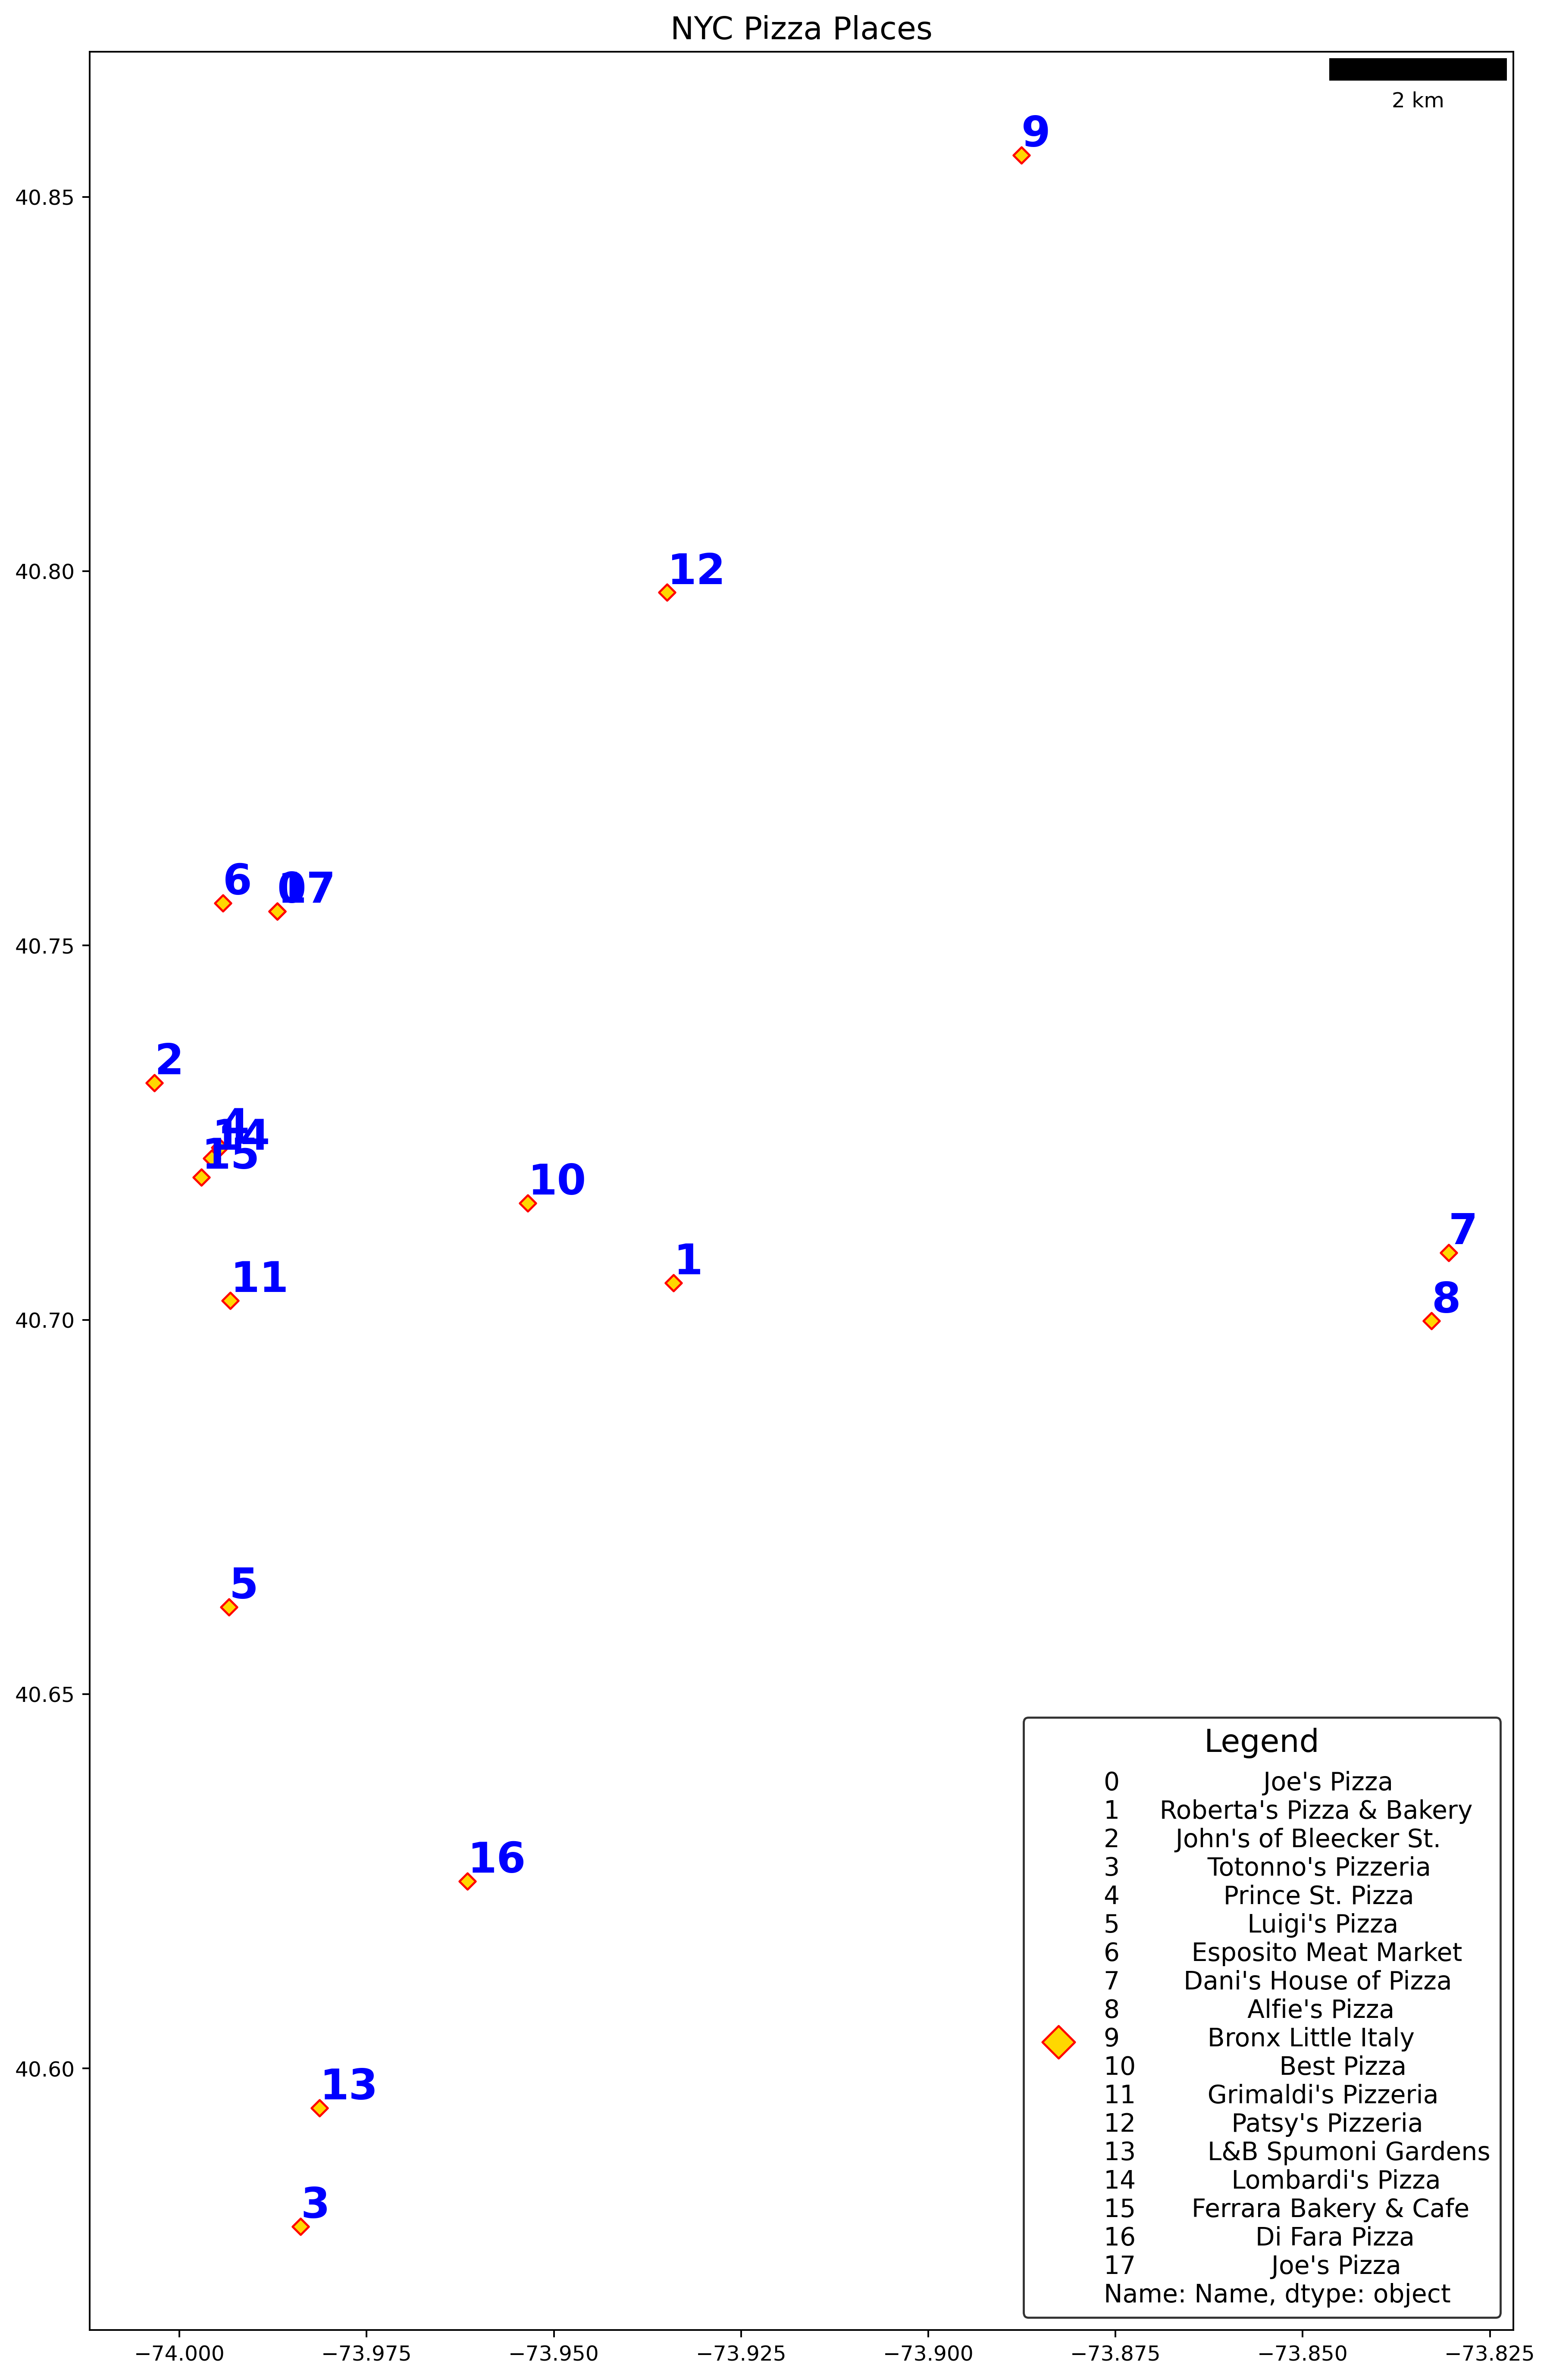

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
#dfNY.plot(ax=ax, alpha=.75, edgecolor='k', facecolor = 'silver',linewidth=2)
#dfNY.apply(lambda x: ax.annotate(s=x.BoroName, xy=x.geometry.centroid.coords[0], size=40,c='gray',alpha=0.3,ha='center', weight='bold'),axis=1)
points.plot(ax=ax, marker="D", markersize=30,  edgecolor='red',color='gold', label=points['Name']) #cmap='copper'

points.apply(lambda x: ax.annotate(s=x.ID, xy=x.geometry.centroid.coords[0],size=20,ha='left',va="bottom",c='blue',weight='bold',alpha=1),axis=1)

x1, x2, y1, y2 = ax.axis()
_y = (y1+y2)/2
p1, p2 = (int(x1), _y), (int(x1)+1, _y)
meter_per_deg = distance_between_points(p1, p2)
scale_bar = ScaleBar(meter_per_deg, units="m")
plt.gca().add_artist(scale_bar)


### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND 
plt.legend(loc="lower right",title='Legend',
           frameon=True,  markerscale=2,fontsize=12, title_fontsize=15,
          fancybox=True,edgecolor = 'k')

#### SAVE TO FILE
plt.savefig('../data/Scalebar2.png')

### The below method of AnchorSize Bar I could not get to work, but am leaving here for reference if perhaps you can!

AttributeError: module 'matplotlib.pyplot' has no attribute 'transData'

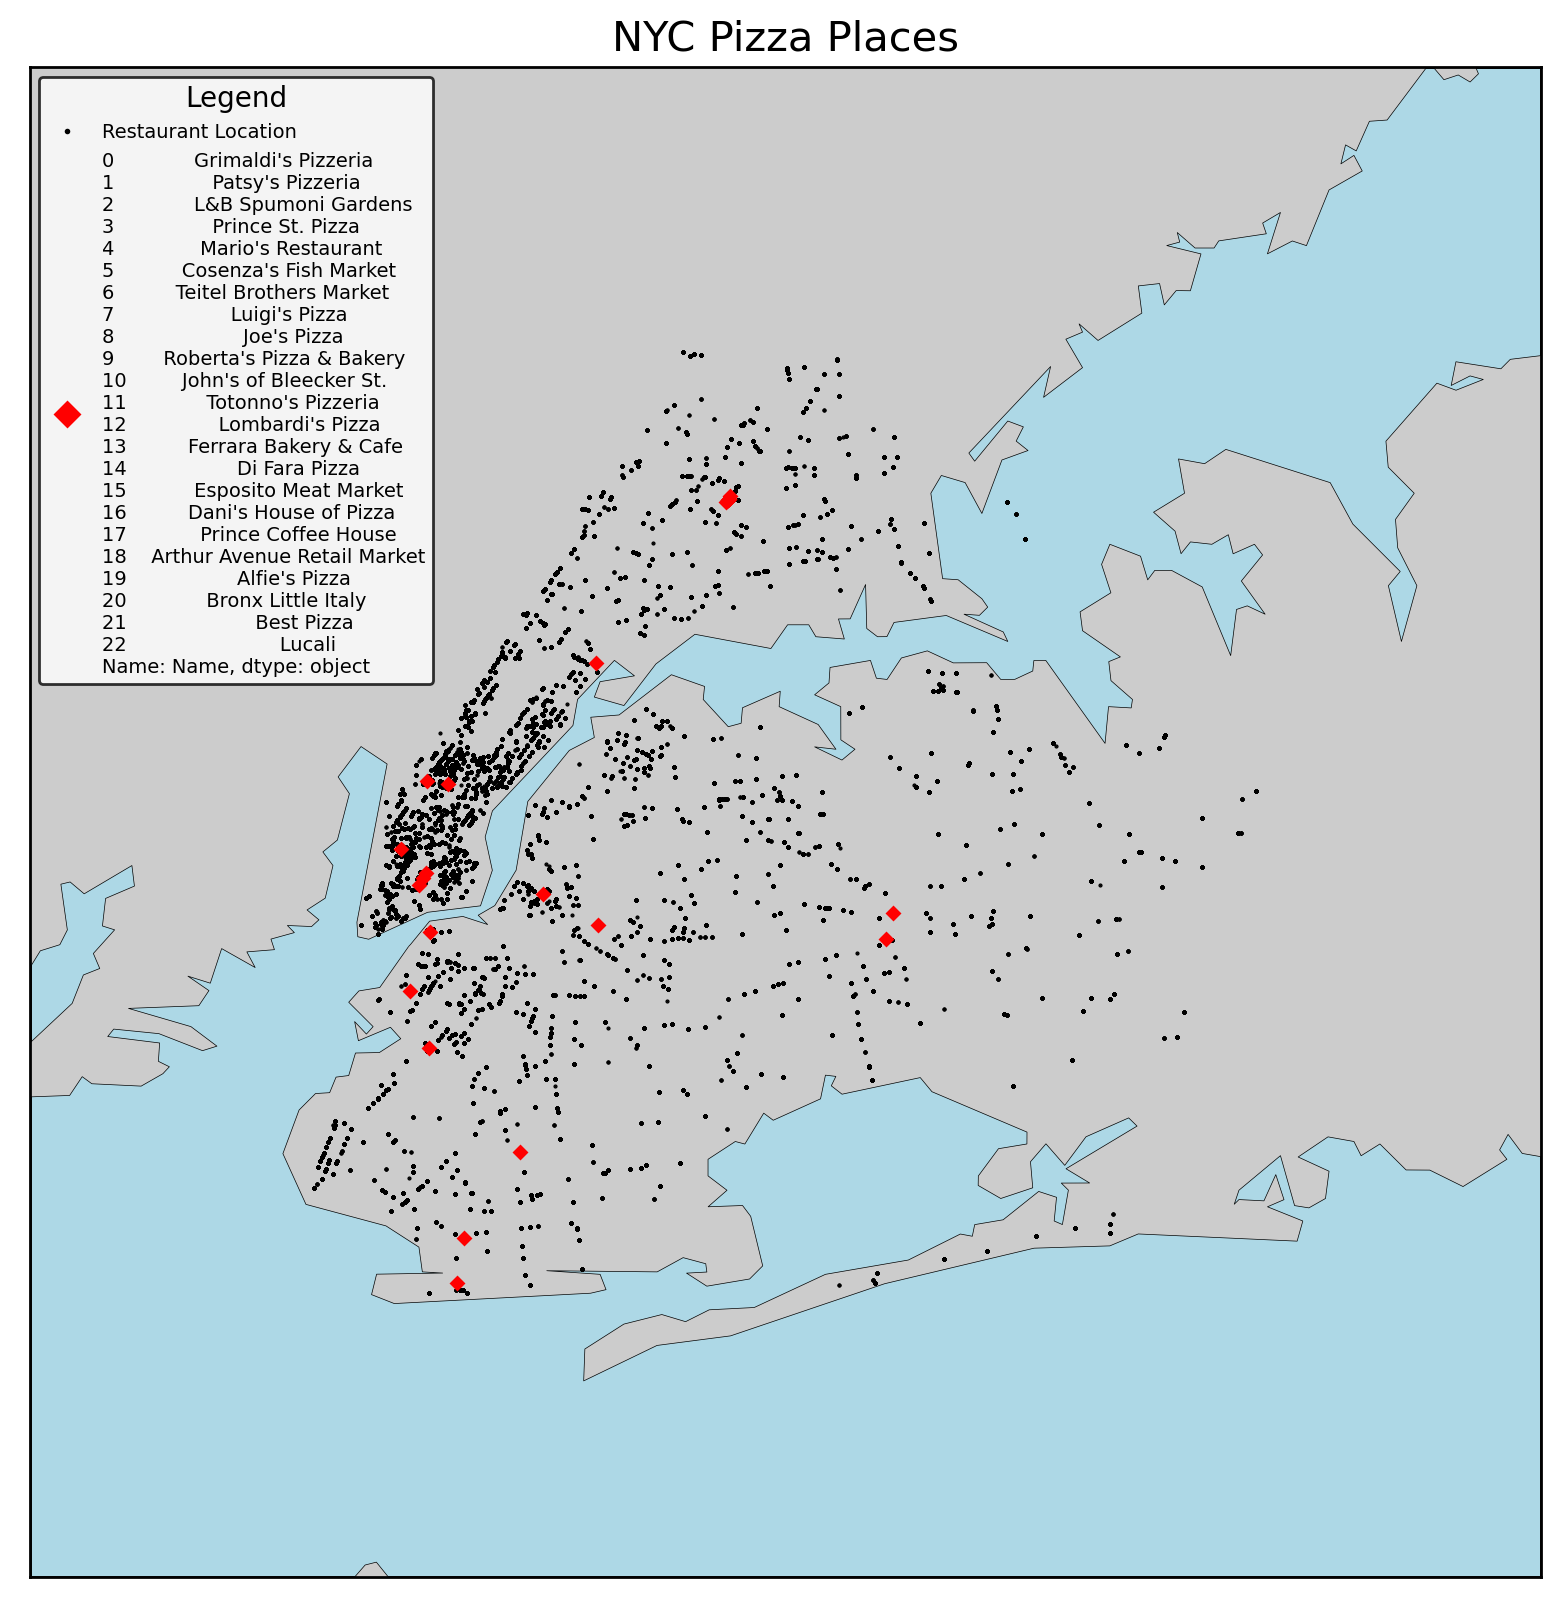

In [54]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.figure(figsize=(10,10))
# create map using BASEMAP
ax = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
ax.drawcoastlines(linewidth=0.25)
ax.drawcountries(linewidth=0.25)
ax.fillcontinents(lake_color='aqua')
ax.drawmapboundary(fill_color='lightblue')
x,y = ax(lon, lat)
x1,y1 = ax(bestPizza['Longitude'], bestPizza['Latitude'])

# ADDING THE "LABEL=" PARAMETER WILL ADD THIS DATA TO THE MAP
ax.plot(x, y, ".",color='k', markersize=1, label="Restaurant Location")
ax.plot(bestPizza['Longitude'], bestPizza['Latitude'], "D",color='red', markersize=3, label=bestPizza['Name'])

### ADD TITLE
plt.title('NYC Pizza Places', fontsize=15)

# SETTING THE LEGEND 
plt.legend(loc="upper left",title='Legend',
           frameon=True,  markerscale=2,fontsize=7, title_fontsize=10,
          fancybox=True,edgecolor = 'k')

scalebar = AnchoredSizeBar(plt.transData,
                           size = 20,label='20 m', loc='lower center', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1)#,
                           #fontproperties=fontprops)

ax.add_artist(scalebar)

plt.show()
